# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.



---


1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset
   
2. **Detail Dataset**:
   - **Tanpa label**: Yes
   - **Jumlah Baris**: 10000
   - **Tipe Data**:
     - *Kategorikal*: gender, education, region, loyalty_status, purchase_frequency, product_category
     - *Numerikal*: id, age, income, purchase_amount, promotion_usage, satisfaction_score

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [15]:
# Library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Untuk clustering dan evaluasi model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/faarismuda/Dicoding-ML-Shop-Customers/main/Dataset/customer_data.csv")
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [17]:
# Melihat informasi umum
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB
None


In [18]:
# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


Tidak ada missing value

In [19]:
# Memeriksa nilai terduplikat
print("\nJumlah Nilai yang terduplikat:")
print(df.duplicated().sum())


Jumlah Nilai yang terduplikat:
0


In [20]:
# Statistik Deskriptif
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


Terdapat umur 12 tahun

In [21]:
# Melihat nilai unik
print("\nCek Nilai Unik:")
print(df.nunique())


Cek Nilai Unik:
id                    100000
age                       38
gender                     2
income                 40003
education                  4
region                     4
loyalty_status             3
purchase_frequency         3
purchase_amount        18902
product_category           7
promotion_usage            2
satisfaction_score        11
dtype: int64


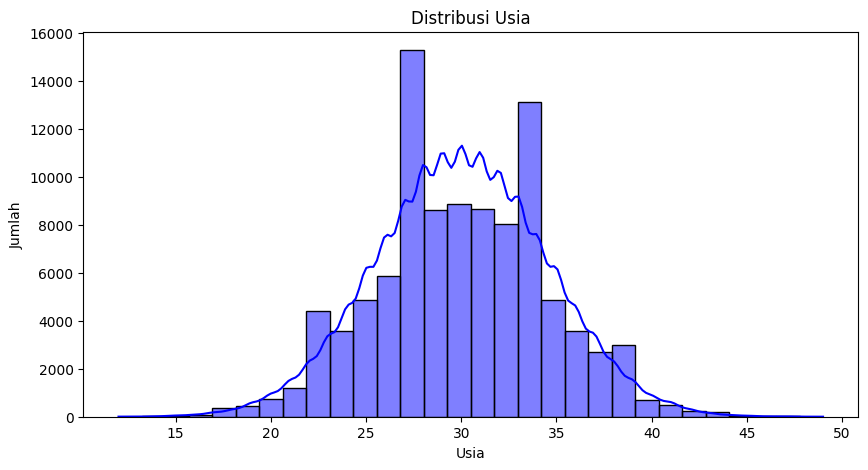

In [22]:
# Distribusi usia customers
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-23-336ea102c858>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='viridis')


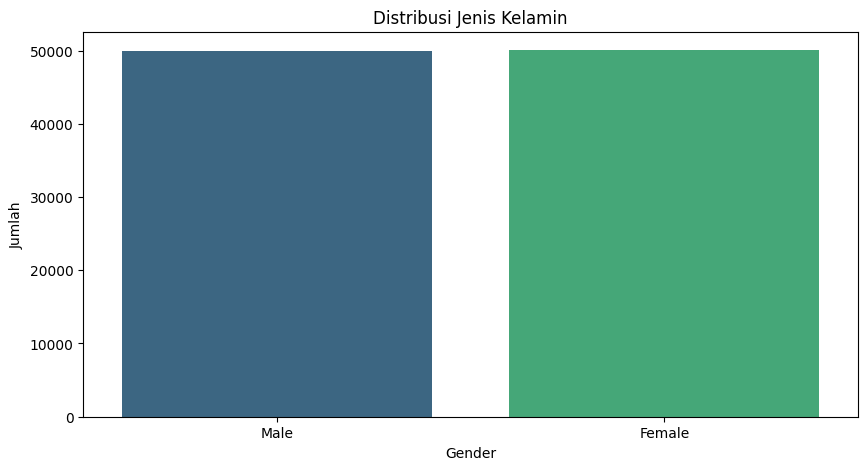

In [23]:
# Distribusi gender
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [24]:
# # Pilih kolom numerik
# numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# print("\nDeteksi dan Penghapusan Outlier per Kolom (metode IQR):")
# for col in numeric_cols:
#     # Hitung kuartil dan IQR untuk kolom tersebut
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Deteksi outlier pada kolom ini (dari data asli)
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     print(f"Kolom '{col}': {len(outliers)} outlier terdeteksi.")

#     # Hapus baris-baris yang mengandung outlier di kolom tersebut
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Visualisasi boxplot untuk tiap kolom numerik setelah penghapusan outlier per kolom
# plt.figure(figsize=(15, 8))
# for i, col in enumerate(numeric_cols):
#     plt.subplot(2, (len(numeric_cols)+1)//2, i+1)
#     sns.boxplot(y=df[col])
#     plt.title(col)
# plt.tight_layout()
# plt.show()

In [25]:
# Jumlah baris
jumlah_baris = len(df)
print(f"Jumlah baris: {jumlah_baris}")

Jumlah baris: 100000


In [26]:
# Membuat salinan dari dataset asli untuk memastikan df_clear tetap utuh
df_clear = df.copy()

# Konversi kategorial ke numerik
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

mapping_freq = {'rare': 0, 'occasional': 1, 'frequent': 2}
df['purchase_frequency'] = df['purchase_frequency'].map(mapping_freq)

mapping_loyalty = {'Regular': 0, 'Silver': 1, 'Gold': 2}
df['loyalty_status'] = df['loyalty_status'].map(mapping_loyalty)

# Buat dictionary untuk menyimpan encoder setiap kolom
label_encoders = {}

# Ubah kolom kategorikal menjadi angka dan simpan encoder-nya
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder untuk kolom ini

# CustomerID tidak digunakan dalam clustering
df = df.drop('id', axis=1)

print("\nDataset setelah encoding dan drop CustomerID:")
df.head()


Dataset setelah encoding dan drop CustomerID:


,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,0,40682,0,0,2,2,18249,1,0,6
1,29,0,15317,3,3,0,0,4557,2,1,6
2,37,0,38849,0,3,1,0,11822,2,0,6
3,30,0,11568,2,2,0,2,4098,4,0,7
4,31,1,46952,1,1,0,1,19685,2,1,5


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [27]:
# Inisialisasi VarianceThreshold dengan threshold=0.0 (menghapus fitur dengan variansi nol)
selector = VarianceThreshold(threshold=0.0)
features_selected = selector.fit_transform(df)

print("\nBentuk fitur setelah seleksi:", features_selected.shape)


Bentuk fitur setelah seleksi: (100000, 11)


In [28]:
# Menentukan jumlah cluster optimal dengan Elbow Method dan Silhouette Score
wcss = []              # Simpan Within-Cluster Sum of Squares
silhouette_scores = []  # Simpan Silhouette Score

# Mencoba k dari 2 hingga 6
k_values = range(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=500, random_state=42)
    labels = kmeans.fit_predict(features_selected)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(features_selected, labels)
    silhouette_scores.append(score)
    print(f"Untuk k = {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.4f}")

Untuk k = 2: WCSS = 4956699415360.10, Silhouette Score = 0.6125
Untuk k = 3: WCSS = 2325884420616.36, Silhouette Score = 0.5620
Untuk k = 4: WCSS = 1398638786305.94, Silhouette Score = 0.5296
Untuk k = 5: WCSS = 972096750101.42, Silhouette Score = 0.5033
Untuk k = 6: WCSS = 733467776615.68, Silhouette Score = 0.4845


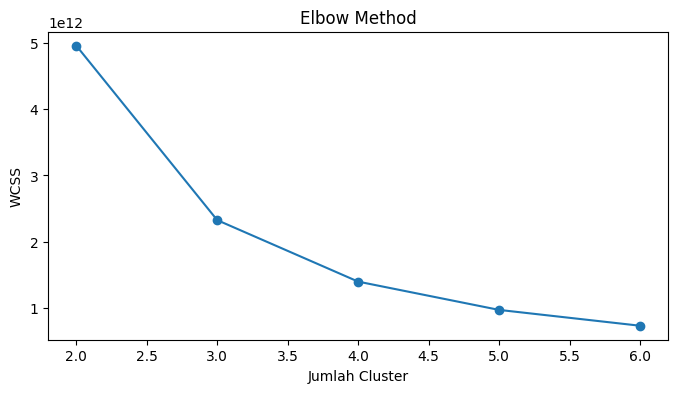

In [29]:
# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(list(k_values), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()

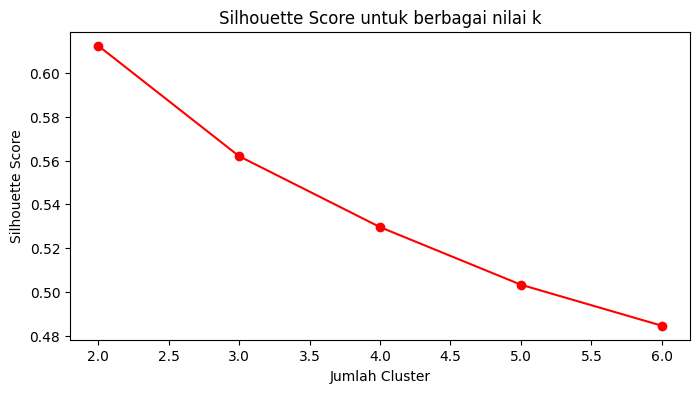

In [30]:
# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(list(k_values), silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score untuk berbagai nilai k")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [31]:
# Menentukan jumlah cluster optimal berdasarkan nilai silhouette tertinggi
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal: {optimal_k}")


Jumlah cluster optimal: 2


In [32]:
# Membangun model K-Means dengan jumlah cluster optimal
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(features_selected)

# Menambahkan label cluster ke dataset asli (atau dataset fitur)
df['Cluster'] = cluster_labels
print("\nDataset dengan label cluster:")
print(df.head())


Dataset dengan label cluster:
   age  gender  income  education  region  loyalty_status  purchase_frequency  \
0   27       0   40682          0       0               2                   2   
1   29       0   15317          3       3               0                   0   
2   37       0   38849          0       3               1                   0   
3   30       0   11568          2       2               0                   2   
4   31       1   46952          1       1               0                   1   

   purchase_amount  product_category  promotion_usage  satisfaction_score  \
0            18249                 1                0                   6   
1             4557                 2                1                   6   
2            11822                 2                0                   6   
3             4098                 4                0                   7   
4            19685                 2                1                   5   

   Cluster  
0     

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [33]:
score = silhouette_score(features_selected, cluster_labels)
print(f"Silhouette Score dari model clustering: {score:.2f}")

Silhouette Score dari model clustering: 0.61


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [34]:
# Pipeline berbeda, sudah dilakukan sebelum tahap menentukan jumlah cluster

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

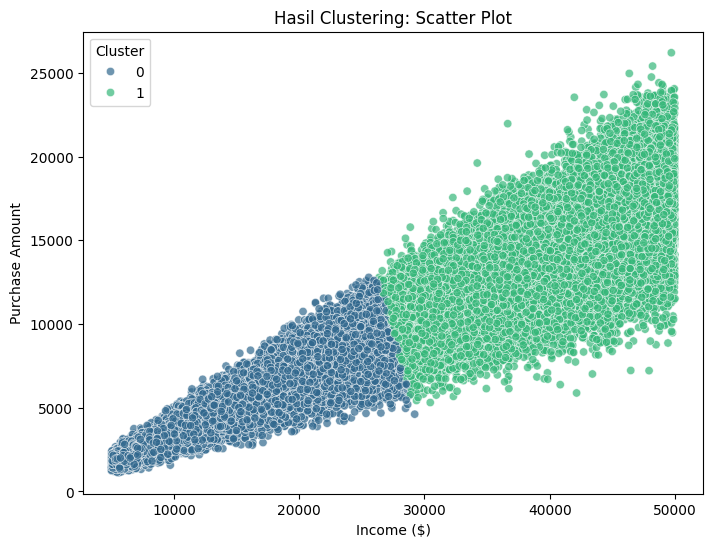

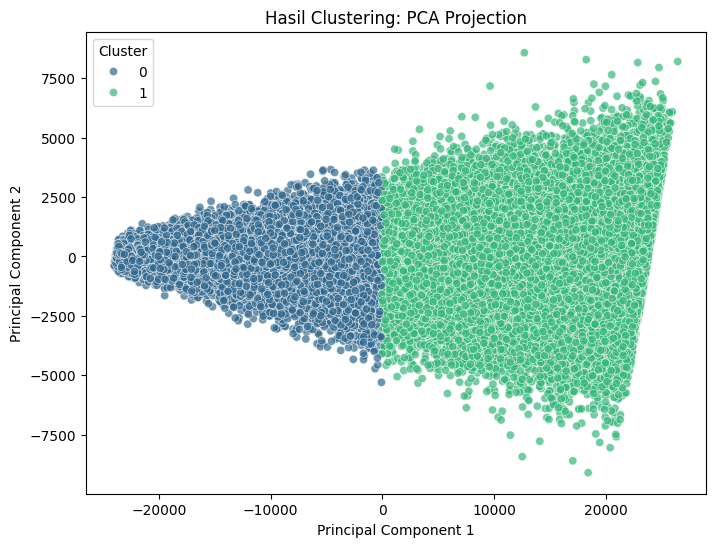

In [35]:
# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['income'], y=df['purchase_amount'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Hasil Clustering: Scatter Plot")
plt.xlabel("Income ($)")
plt.ylabel("Purchase Amount")
plt.legend(title="Cluster")
plt.show()

# Visualisasi hasil clustering dengan PCA Projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['Cluster']))

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis', alpha=0.7)
plt.title("Hasil Clustering: PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

In [36]:
# Ubah angka menjadi kategorikal

# Membuat ulang encoder dan menyusun ulang kategori berdasarkan data asli
for col in df_clear.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(df_clear[col])  # Latih encoder dengan data asli sebelum encoding
    df[col] = le.inverse_transform(df[col])  # Ubah angka kembali ke kategori

# Menampilkan hasil
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Cluster
0,27,Female,40682,Bachelor,East,Silver,rare,18249,Books,0,6,1
1,29,Female,15317,Masters,West,Gold,frequent,4557,Clothing,1,6,0
2,37,Female,38849,Bachelor,West,Regular,frequent,11822,Clothing,0,6,1
3,30,Female,11568,HighSchool,South,Gold,rare,4098,Food,0,7,0
4,31,Male,46952,College,North,Gold,occasional,19685,Clothing,1,5,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Menambahkan label cluster ke dataset asli jika belum dilakukan
df['Cluster'] = cluster_labels

# Pilih hanya kolom numerik untuk perhitungan rata-rata
numeric_cols = df.select_dtypes(include=['number']).columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

# Menampilkan hasil analisis karakteristik setiap cluster
for cluster in cluster_summary.index:
    print(f"Cluster {cluster}:")
    print(f"Rata-rata Pemasukan: {cluster_summary.loc[cluster, 'income']:.2f}")
    print(f"Rata-rata Jumlah Pengeluaran: {cluster_summary.loc[cluster, 'purchase_amount']:.2f}")
    print("\n")


Cluster 0:
Rata-rata Pemasukan: 16213.47
Rata-rata Jumlah Pengeluaran: 5649.75


Cluster 1:
Rata-rata Pemasukan: 38720.49
Rata-rata Jumlah Pengeluaran: 13585.07




### Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

#### Cluster 1:
- **Rata-rata Annual Income:** 16226.59
- **Rata-rata Jumlah Pengeluaran:** 5654.45
- **Analisis:** Cluster ini memiliki rata-rata pendapatan tahunan yang rendah 16.2k dan pengeluaran yang juga rendah 5.6k. Hal ini mengindikasikan bahwa pelanggan dalam cluster ini kemungkinan berasal dari kelompok ekonomi menengah ke bawah, dengan daya beli yang terbatas.
Selain itu, pelanggan dalam kelompok ini mungkin lebih selektif dalam melakukan pembelian, cenderung membeli produk dengan harga lebih terjangkau, atau hanya membeli barang yang benar-benar dibutuhkan.

#### Cluster 2:
- **Rata-rata Annual Income:** 38730.48
- **Rata-rata Jumlah Pengeluaran:** 13588.68
- **Analisis:** Cluster ini memiliki rata-rata pendapatan tahunan yang lebih tinggi 38.7k dan pengeluaran yang juga lebih besar 13.5k. Pelanggan dalam cluster ini cenderung memiliki daya beli yang lebih baik dan lebih sering melakukan pembelian dalam jumlah besar.
Mereka mungkin termasuk dalam kategori pelanggan loyal yang aktif menggunakan promo atau pelanggan yang mengutamakan kualitas dibanding harga.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
# Simpan hasil clustering ke dalam file CSV
df.to_csv('clustering_results.csv', index=False)